In [156]:
import scipy.stats as sps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from statistics import variance

In [27]:
df=pd.read_csv('Data.csv')



In [28]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d')

In [29]:
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [30]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
944463,575312,22083,PAPER CHAIN KIT RETROSPOT,6,2011-11-09,2.95,13588.0,United Kingdom
944464,575312,23355,HOT WATER BOTTLE KEEP CALM,4,2011-11-09,4.95,13588.0,United Kingdom
944465,575312,22110,BIRD HOUSE HOT WATER BOTTLE,6,2011-11-09,2.55,13588.0,United Kingdom
944466,575312,22037,ROBOT BIRTHDAY CARD,12,2011-11-09,0.42,13588.0,United Kingdom


In [34]:
df=df[(df['Quantity']>0) & (df['Price']>0.00)]

In [36]:
df['Total']=df['Quantity']*df['Price']
df

C:\Users\12967\AppData\Local\Temp\ipykernel_15912\4208469425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total']=df['Quantity']*df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
944463,575312,22083,PAPER CHAIN KIT RETROSPOT,6,2011-11-09,2.95,13588.0,United Kingdom,17.70
944464,575312,23355,HOT WATER BOTTLE KEEP CALM,4,2011-11-09,4.95,13588.0,United Kingdom,19.80
944465,575312,22110,BIRD HOUSE HOT WATER BOTTLE,6,2011-11-09,2.55,13588.0,United Kingdom,15.30
944466,575312,22037,ROBOT BIRTHDAY CARD,12,2011-11-09,0.42,13588.0,United Kingdom,5.04


In [37]:
df_group=df.groupby(['InvoiceDate', 'Customer ID']).agg({'Total': ['sum']}). reset_index()

In [38]:
df_group.columns = df_group.columns.droplevel(1)

In [39]:
df_group['Customer ID'] = df_group['Customer ID'].astype(str)

In [40]:
df_group['id'] = df_group['InvoiceDate'] +' '+df_group['Customer ID']

In [41]:
df_res=df_group[['id', 'Total']]
df_res

,id,Total
0,2009-12-01 12362.0,130.00
1,2009-12-01 12490.0,603.94
2,2009-12-01 12533.0,929.92
3,2009-12-01 12636.0,141.00
4,2009-12-01 12682.0,426.30
...,...,...
30631,2011-11-09 17841.0,446.98
30632,2011-11-09 17865.0,1130.74
30633,2011-11-09 18109.0,261.20
30634,2011-11-09 18144.0,315.00


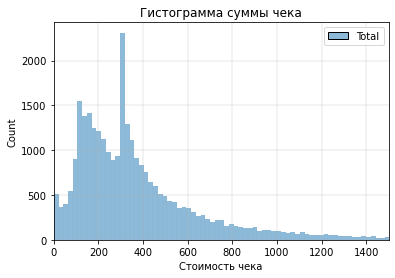

In [42]:
sns.histplot(df_res)
plt.title("Гистограмма суммы чека")
plt.xlabel("Стоимость чека")
plt.grid(linewidth=0.3) 
plt.xlim(0, 1500)
plt.show()

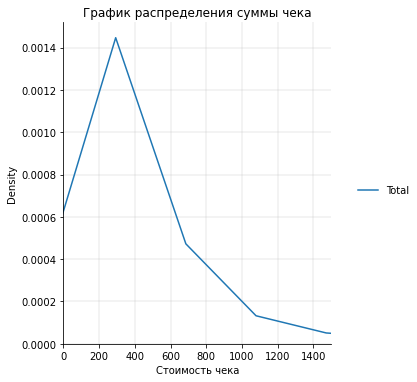

In [43]:
sns.displot(df_res, kind='kde')
plt.title("График распределения суммы чека")
plt.xlabel("Стоимость чека")
plt.grid(linewidth=0.3) 
plt.xlim(0, 1500)
plt.show()

In [45]:
customers, counts=np.unique(df_res['Total'], return_counts=True)

In [63]:
len(np.unique(customers))

23846

In [57]:
freq=counts.astype(float)/len(customers)

In [127]:
x = np.linspace (df_res['Total'].min()+0.01, df_res['Total'].max(), df_res['Total'].shape[0])


In [128]:
y1 = sps.gamma.pdf (x, a=2.5 , scale=200)

(0.0, 300.0)

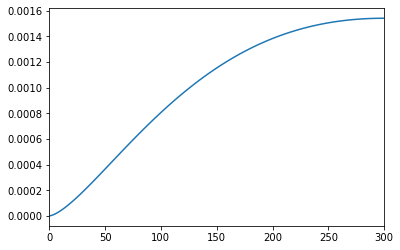

In [129]:
plt.plot (x, y1)
plt.xlim(0,300)

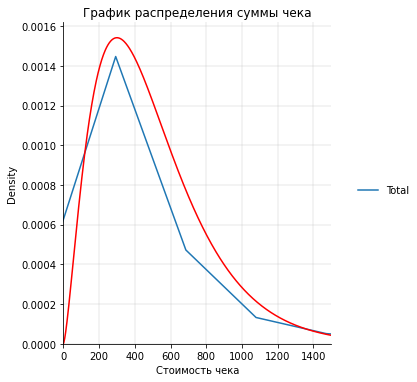

In [130]:
sns.displot(df_res, kind='kde')
plt.plot (x, y1, color='red')
plt.xlim(0,300)
plt.title("График распределения суммы чека")
plt.xlabel("Стоимость чека")
plt.grid(linewidth=0.3) 
plt.xlim(0, 1500)
plt.show()

In [131]:
y2 = sps.chi2.pdf (x,6 ,loc=-150, scale=100)

(0.0, 300.0)

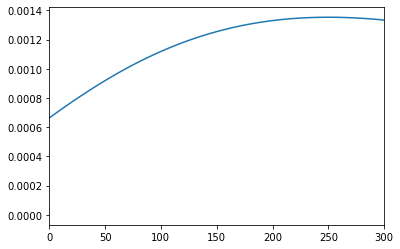

In [132]:
plt.plot (x, y2)
plt.xlim(0,300)

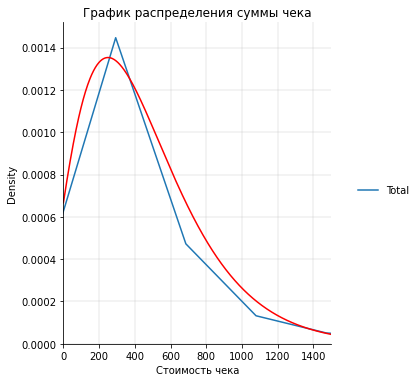

In [133]:
sns.displot(df_res, kind='kde')
plt.plot (x, y2, color='red')
plt.xlim(0,300)
plt.title("График распределения суммы чека")
plt.xlabel("Стоимость чека")
plt.grid(linewidth=0.3) 
plt.xlim(0, 1500)
plt.show()

In [134]:
a=np.array(df_res['Total'])
a

array([130.  , 603.94, 929.92, ..., 261.2 , 315.  , 355.32])

In [135]:
def pdf(k: int, rnd_list: list):
    """
    Получает кривую плотности распределения вероятности
    :param k: количечиво интервалов разбиения гистограммы
    :param rnd_list: случайный процесс
    :return: pandas.DataFrame
    """
    pdf_x = []  # Координаты по оси абсцисс
    pdf_y = []  # Координаты по оси ординат
    n = len(rnd_list)  # количество элементов в рассматриваемой выборке
    h = (max(rnd_list) - min(rnd_list)) / k  # ширина одного интервала
    a = min(rnd_list)  # минимальное значение в рассматриваемой выборке
    for i in range(0, k):  # проход по интервалам
        count = 0
        for j in rnd_list:  # подсчет количества вхождений значений из выборки в данный интервал
            if (a + i * h) < j < (a + (i * h) + h):
                count = count + 1
        pdf_x.append(a + i * h + h / 2)  # координата по оси абсцисс полученной кривой плотности распределения
        # вероятности
        pdf_y.append(count / (n * h))  # координата по оси ординат полученной кривой плотности распределения
        # вероятности
    d = {'x': pdf_x, 'y': pdf_y}
    return pd.DataFrame(d)

In [136]:
r_pdf = pdf(df_res['Total'].shape[0], df_res['Total'])
r_pdf['y']

0        0.000466
1        0.000687
2        0.000687
3        0.000959
4        0.000453
           ...   
30631    0.000000
30632    0.000000
30633    0.000000
30634    0.000000
30635    0.000013
Name: y, Length: 30636, dtype: float64

In [141]:
r_pdf = pdf(20, df_res['Total'])
r_pdf=r_pdf[r_pdf['y']>0.00]

In [142]:
len(r_pdf)

12

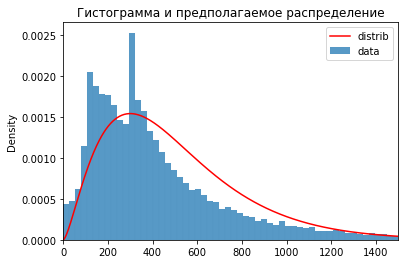

In [143]:
sns.histplot(customers, stat='density', label='data')
plt.plot(x, y1, color='red', label='distrib')
plt.legend()
plt.title('Гистограмма и предполагаемое распределение')
plt.xlim(0,1500)
plt.show()

In [144]:
counts_points, points = np.histogram(customers, bins=len(r_pdf))

In [145]:
obs_freq = counts_points.astype(float)/sum(counts_points)

In [146]:
gamma_freq=r_pdf['y']

In [147]:
midpoints = [(points[i-1]+points[i])/2 for i in range (1, len(points))]

In [148]:
chisquare(obs_freq, gamma_freq/sum(gamma_freq)*sum(obs_freq))

Power_divergenceResult(statistic=0.002051394071748059, pvalue=1.0)

In [159]:
beta = 0.8

In [168]:
a=np.array(df_res['Total'])
n=len(a)

In [166]:
m = np.mean(a)
m

523.198883274579

In [167]:
d=np.var(a)
d

1681973.164982893

In [169]:
sco=np.sqrt(d/n)
sco

7.409578455279072

In [171]:
tb = sps.norm.ppf((1.0+beta)/2.0)
tb

1.2815515655446004

In [172]:
eps = tb*sco
m1 = m - eps
m2 = m + eps
eps

9.495756869388437

In [173]:
f"Доверительный интервал Ib = ({m1:.4f}; {m2:.4f})"

'Доверительный интервал Ib = (513.7031; 532.6946)'